In [1]:
import jax
jax.config.update('jax_platform_name', 'cpu')

In [15]:
from ott.geometry import pointcloud
from ott.solvers.linear import sinkhorn
from ott.problems.linear import linear_problem
import jax.numpy as jnp

In [3]:
from entot.models.models import NoiseOutsourcingModel
from entot.models.utils import MixtureNormalSampler

In [10]:
sampler_source = MixtureNormalSampler([0], 1, 10, 0.5)
sampler_target = MixtureNormalSampler([-1.0,1.0], 1, 9, 0.1)

In [18]:
source = sampler_source(jax.random.PRNGKey(1))
target = sampler_target(jax.random.PRNGKey(0))

In [22]:
geom = pointcloud.PointCloud(source, target, epsilon=1e-1)
out = sinkhorn.Sinkhorn()(linear_problem.LinearProblem(geom))
pi_star_inds = jax.random.categorical(jax.random.PRNGKey(0), logits=jnp.log(out.matrix.flatten()), shape=(15,))
inds_source = pi_star_inds // len(target)
inds_target = pi_star_inds % len(target)

<Axes: >

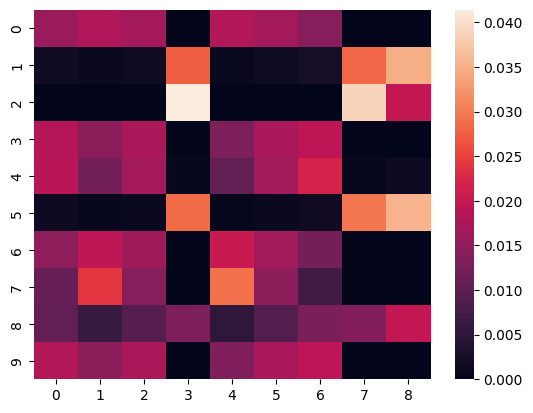

In [20]:
import seaborn as sns
sns.heatmap(out.matrix)

In [23]:
inds_source

Array([9, 1, 7, 6, 9, 7, 7, 5, 3, 2, 2, 4, 8, 7, 6], dtype=int32)

In [24]:
inds_target

Array([5, 8, 4, 1, 6, 1, 1, 8, 2, 3, 3, 0, 2, 2, 5], dtype=int32)